In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import metrics

In [3]:
#DataLoad
dataset = pd.read_csv("C:/Users/35389/Documents/2005_-_2015_Graduation_Outcomes.csv", encoding = "ISO-8859-1")

In [4]:
print(dataset.info())
print(dataset.head())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 22 columns):
Cohort Year                          430 non-null int64
Cohort Category                      430 non-null object
Demographic                          430 non-null object
# Total Cohort                       430 non-null int64
# Total Grads                        430 non-null int64
% of cohort Total Grads              430 non-null float64
# of cohort Total Grads              430 non-null int64
% of cohort Total Regents            430 non-null float64
% of grads  Total Regents            430 non-null float64
# of grads  Total Regents            420 non-null float64
% of cohort  Advanced Regents        420 non-null float64
% of grads  Advanced Regents         420 non-null float64
# of grads  Advanced Regents         420 non-null float64
% of cohort  Regents w/o Advanced    420 non-null float64
% of grads  Regents w/o Advanced     420 non-null float64
# of grads  Regents w/o Advanced   

,Cohort Year,# Total Cohort,# Total Grads,% of cohort Total Grads,# of cohort Total Grads,% of cohort Total Regents,% of grads Total Regents,# of grads Total Regents,% of cohort Advanced Regents,% of grads Advanced Regents,# of grads Advanced Regents,% of cohort Regents w/o Advanced,% of grads Regents w/o Advanced,# of grads Regents w/o Advanced,% of cohort Local,% of grads Local,# Still Enrolled,% of cohort Still Enrolled,# Dropped Out,% of cohort Dropped Out
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,2006.186047,30728.830233,20082.302326,62.319767,16250.748837,49.482558,75.448140,5002.169048,16.532143,23.751190,11331.492857,33.167381,51.925476,3839.400000,12.860233,45.530000,4519.990698,15.620930,5014.179070,17.383721
std,2.866540,21193.889781,15423.868054,16.013714,13673.310038,20.837416,20.221693,4220.128136,12.296028,14.100374,9898.656051,13.379219,16.030910,3869.125207,8.209207,2.691627,4150.879411,10.555136,3673.011177,8.034310
min,2001.000000,6974.000000,1287.000000,17.100000,256.000000,2.900000,13.800000,35.000000,0.400000,1.900000,218.000000,2.300000,11.900000,117.000000,0.600000,33.200000,129.000000,1.100000,513.000000,4.600000
25%,2004.000000,10821.500000,7944.250000,52.975000,6456.500000,35.700000,63.875000,1626.750000,7.000000,13.000000,3231.250000,23.475000,40.350000,1144.750000,4.700000,45.200000,1547.500000,6.800000,2071.250000,10.900000
50%,2006.000000,26626.000000,16168.000000,65.450000,12180.500000,52.350000,80.700000,3343.000000,14.900000,24.250000,8880.000000,33.650000,48.850000,2101.000000,13.250000,45.200000,3105.500000,12.450000,4156.500000,16.000000
75%,2009.000000,39287.250000,27429.250000,75.200000,23951.500000,65.625000,92.575000,7120.000000,19.600000,28.225000,16572.250000,44.150000,67.725000,5817.750000,19.175000,45.200000,6599.500000,22.700000,7075.250000,21.600000
max,2011.000000,70545.000000,53974.000000,87.700000,52374.000000,85.500000,99.200000,13479.000000,47.100000,58.600000,38895.000000,58.100000,82.500000,17392.000000,30.400000,69.300000,18972.000000,48.300000,19482.000000,45.000000


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 22 columns):
Cohort Year                          430 non-null int64
Cohort Category                      430 non-null object
Demographic                          430 non-null object
# Total Cohort                       430 non-null int64
# Total Grads                        430 non-null int64
% of cohort Total Grads              430 non-null float64
# of cohort Total Grads              430 non-null int64
% of cohort Total Regents            430 non-null float64
% of grads  Total Regents            430 non-null float64
# of grads  Total Regents            420 non-null float64
% of cohort  Advanced Regents        420 non-null float64
% of grads  Advanced Regents         420 non-null float64
# of grads  Advanced Regents         420 non-null float64
% of cohort  Regents w/o Advanced    420 non-null float64
% of grads  Regents w/o Advanced     420 non-null float64
# of grads  Regents w/o Advanced   

In [6]:
for i in range(0, len(dataset.columns)):
    dataset.iloc[:,i] = pd.to_numeric(dataset.iloc[:,i], errors='ignore')

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 22 columns):
Cohort Year                          430 non-null int64
Cohort Category                      430 non-null object
Demographic                          430 non-null object
# Total Cohort                       430 non-null int64
# Total Grads                        430 non-null int64
% of cohort Total Grads              430 non-null float64
# of cohort Total Grads              430 non-null int64
% of cohort Total Regents            430 non-null float64
% of grads  Total Regents            430 non-null float64
# of grads  Total Regents            420 non-null float64
% of cohort  Advanced Regents        420 non-null float64
% of grads  Advanced Regents         420 non-null float64
# of grads  Advanced Regents         420 non-null float64
% of cohort  Regents w/o Advanced    420 non-null float64
% of grads  Regents w/o Advanced     420 non-null float64
# of grads  Regents w/o Advanced   

In [30]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 22 columns):
Cohort Year                          430 non-null int32
Cohort Category                      430 non-null object
Demographic                          430 non-null object
# Total Cohort                       430 non-null int64
# Total Grads                        430 non-null int64
% of cohort Total Grads              430 non-null float64
# of cohort Total Grads              430 non-null int64
% of cohort Total Regents            430 non-null float64
% of grads  Total Regents            430 non-null float64
# of grads  Total Regents            420 non-null float64
% of cohort  Advanced Regents        420 non-null float64
% of grads  Advanced Regents         420 non-null float64
# of grads  Advanced Regents         420 non-null float64
% of cohort  Regents w/o Advanced    420 non-null float64
% of grads  Regents w/o Advanced     420 non-null float64
# of grads  Regents w/o Advanced   

In [31]:
dataset['Cohort Year'] = dataset['Cohort Year'].astype(int)

In [32]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 22 columns):
Cohort Year                          430 non-null int32
Cohort Category                      430 non-null object
Demographic                          430 non-null object
# Total Cohort                       430 non-null int64
# Total Grads                        430 non-null int64
% of cohort Total Grads              430 non-null float64
# of cohort Total Grads              430 non-null int64
% of cohort Total Regents            430 non-null float64
% of grads  Total Regents            430 non-null float64
# of grads  Total Regents            420 non-null float64
% of cohort  Advanced Regents        420 non-null float64
% of grads  Advanced Regents         420 non-null float64
# of grads  Advanced Regents         420 non-null float64
% of cohort  Regents w/o Advanced    420 non-null float64
% of grads  Regents w/o Advanced     420 non-null float64
# of grads  Regents w/o Advanced   

In [36]:

column=['Cohort Category','Demographic','# Total Cohort','# Total Grads','% of cohort Total Grads','# of cohort Total Grads','% of cohort Total Regents','% of grads  Total Regents','# of grads  Total Regents','% of cohort  Advanced Regents','% of grads  Advanced Regents','# of grads  Advanced Regents','% of cohort  Regents w/o Advanced','% of grads  Regents w/o Advanced','# of grads  Regents w/o Advanced','% of cohort Local','% of grads Local','# Still Enrolled','% of cohort Still Enrolled','# Dropped Out','% of cohort Dropped Out']
x=dataset[column]
y=dataset[['Cohort Year']]

In [41]:
dataset=pd.get_dummies(dataset)

In [42]:

from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
com_sub_scaled = feature_scaler.fit_transform(x)

ValueError: could not convert string to float: '4 Year  June'

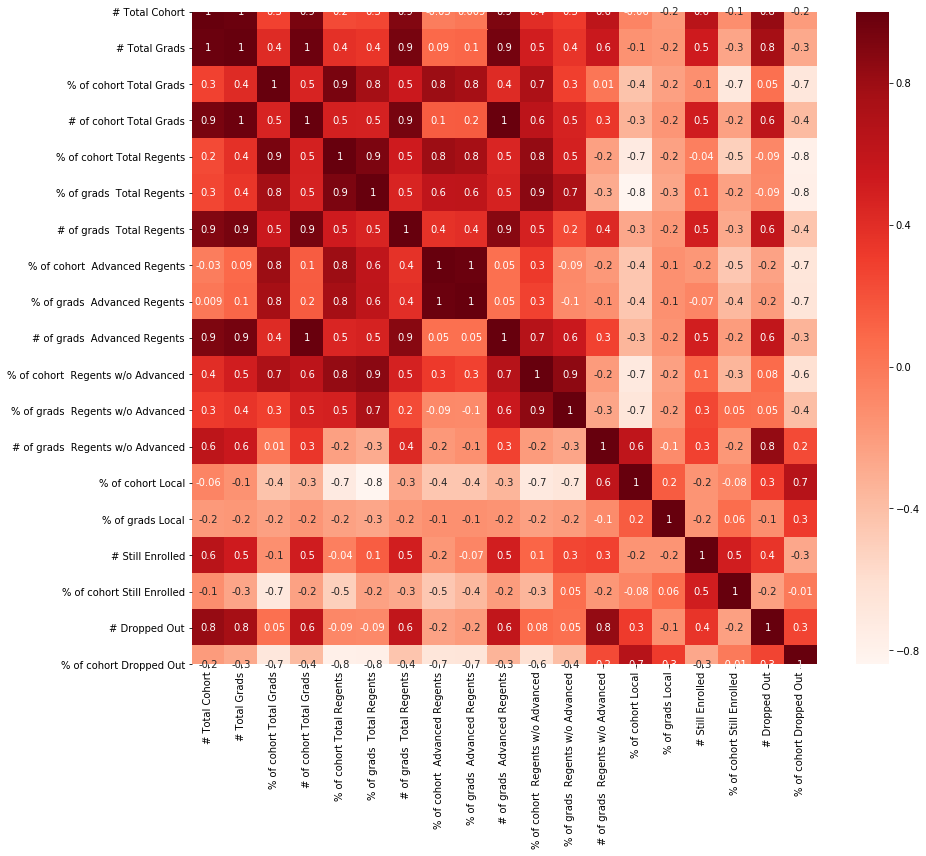

In [17]:
#heatmap
import seaborn as sns
correlations_sub = x.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlations_sub, annot=True, cmap=plt.cm.Reds, fmt='.1g')
plt.show()

In [18]:
#splitting the data into 70:30 ratio
data_train, data_test, label_train, label_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
#Linear Regression
LinearReg = LinearRegression()
#fit
LinearReg = LinearReg.fit(data_train, label_train)
#predict
LinearReg_label_predict = LinearReg.predict(data_test)

ValueError: could not convert string to float: '5 Year August'

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, LinearReg_label_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(label_test, LinearReg_label_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, LinearReg_label_predict)))

NameError: name 'LinearReg_label_predict' is not defined

In [21]:
#plot linear regression 
plt.plot(data_test, LinearReg_label_predict, color='r', linewidth=0.2)

NameError: name 'LinearReg_label_predict' is not defined

In [22]:
#getting values compared - Actual value v/s Predicted value
df = pd.DataFrame({'Actual': label_test, 'Predicted': LinearReg_label_predict})
df1 = df.head(50)
df1

NameError: name 'LinearReg_label_predict' is not defined

In [23]:
#Plot to compare the actual values and the predicted values 
df1.plot(kind='bar',figsize=(10,8)) #, color='red, black')
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

NameError: name 'df1' is not defined

In [24]:
#Logistic Regression 
LogReg = LogisticRegression()
#fitting the model
LogReg = LogReg.fit(data_train, label_train)
#predictting 
LogReg_label_predict = LogReg.predict(data_test)

C:\Users\35389\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Student with Disability'

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, LogReg_label_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(label_test, LogReg_label_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, LogReg_label_predict)))

NameError: name 'LogReg_label_predict' is not defined

In [26]:
#Random Forest
RF = RandomForestRegressor()
#fitting the model
RF = RF.fit(data_train, label_train)
#predicttion 
RF_label_predict = RF.predict(data_test)
#Accuracy of the model
RF_Accuracy = metrics.accuracy_score(label_test, LogReg_label_predict)
print (RF_Accuracy * 100)

C:\Users\35389\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '5 Year August'

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, RF_label_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(label_test, RF_label_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, RF_label_predict)))

NameError: name 'RF_label_predict' is not defined

In [28]:
#Gradient Boost Regression 
GBR = GradientBoostingRegressor()
#fitting the  model
GBR = GBR.fit(data_train, label_train)
#predicting values
GBR_label_predict = GBR.predict(data_test)

ValueError: could not convert string to float: '5 Year August'

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, GBR_label_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(label_test, GBR_label_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, GBR_label_predict)))

NameError: name 'GBR_label_predict' is not defined